(sec_PythonIntegracion)=
# Integración en **Python**

En esta sección aprenderemos a integrar con `SymPy` y a aproximar integrales definidas usando `NumPy`.

## Integración con **SymPy**
Para calcular exactamente la integral de una función mediante SymPy, se emplea la función *integrate*. 
Por ejemplo, para calcular una primitiva de $\sin(x)$, escribiremos 

In [73]:
import sympy as sp

x = sp.symbols('x')
f = sp.sin(x)
I = sp.integrate(f,x)

print('Una primitiva de ',f, ' es = ',I)

Una primitiva de  sin(x)  es =  -cos(x)


Para calcular la integral definida $\displaystyle\int_0^\pi\sin(x)\,dx$, escribiremos

In [74]:
import sympy as sp

x = sp.symbols('x')
f = sp.sin(x)
Idef = sp.integrate(f,(x,0,sp.pi))

print('La integral de ',f, ' entre 0 y pi es = ',Idef)

La integral de  sin(x)  entre 0 y pi es =  2


`SymPy` no siempre es capaz de calcular una primitiva. En caso de no poder hacerlo, devuelve como salida la integral de partida:

In [75]:
I = sp.integrate(sp.sin(x*sp.cos(x)),x)
print(I)

Integral(sin(x*cos(x)), x)


Es posible calcular algunas integrales impropias, cuando los límites de integración son $-\infty$ y/o $+\infty$, es decir, integrales de la forma:

$$
\int_{-\infty}^bf(x)\,dx\,,\quad
\int_{a}^{+\infty}f(x)\,dx\,,\quad
\int_{-\infty}^{+\infty}f(x)\,dx\,.
$$

In [76]:
x = sp.symbols('x')
f = sp.exp(x)
I1 = sp.integrate(f,(x,-sp.oo,0))

print('Integral de ',f,' entre -oo y 0 es = ',I1)

g = 1/(x**2)
I2 = sp.integrate(g,(x,1,sp.oo))

print('Integral de ',g,' entre 1 y +oo es = ',I2)


Integral de  exp(x)  entre -oo y 0 es =  1
Integral de  x**(-2)  entre 1 y +oo es =  1


Si necesitamos calcular una integral impropia de segunda especie, como por ejemplo, 

$$
\int_{-1}^2\dfrac{1}{x}\,dx\,,
$$
y hacemos:

In [77]:
h = 1/x
I2e = sp.integrate(h,(x,-1,2))
print('La integral vale = ', I2e)

La integral vale =  nan


En este caso, para entender qué está ocurriendo, es mejor usar la definición: 

$$
\int_{-1}^2\dfrac{1}{x}\,dx =\int_{-1}^0\dfrac{1}{x}\,dx +\int_{0}^2\dfrac{1}{x}\,dx\,,  
$$
donde 

$$
\int_{-1}^0\dfrac{1}{x}\,dx =\lim_{b\rightarrow 0^-}\int_{-1}^b\dfrac{1}{x}\,dx\,,
$$
y

$$
\int_{0}^2\dfrac{1}{x}\,dx =\lim_{a\rightarrow 0^+}\int_{a}^2\dfrac{1}{x}\,dx\,.
$$

In [78]:
h = 1/x
a,b = sp.symbols('a:b', real=True)
L1 = sp.limit(sp.integrate(h,(x,-1,b)),b,0,'-')
L2 = sp.limit(sp.integrate(h,(x,a,2)),a,0,'+')
print('Valor del primer límite = ', L1)
print('Valor del segundo límite = ', L2)
print('La integral impropia es = ',L1+L2)

Valor del primer límite =  -oo
Valor del segundo límite =  oo
La integral impropia es =  nan


## Integración numérica. Fórmulas simples

Como hemos visto, no siempre es posible calcular exactamente la integral de una función mediante SymPy.
También puede ocurrir que la expresión de la primitiva sea demasiado costosa de evaluar o que solo conozcamos los valores de la función en un conjunto finito de puntos. En estos casos, se emplean técnicas de integración numérica.

Importamos a continuación los módulos necesarios.

In [79]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


En la Sección {ref}`sec_IntegracionNumerica` hemos visto varias fórmulas de integración numérica para aproximar una integral de la forma 

$$
\int_a^bf(x)\,dx
$$
donde $a$ y $b$ son números reales. Concretamente, hemos visto las fórmulas del punto medio, del trapecio y de Simpson. 

Vamos a aproximar la integral de

$$
I=\int_{0}^{3}\left(x^4+1\right)\,dx\,,
$$
mediante diferentes fórmulas de cuadratura.

Recuerda que, en este caso sencillo, podemos conocer el valor exacto de la integral:

$$
I=\int_{0}^{3}\left(x^4+1\right)\,dx = \left[\frac{x^5}{5}+x\right]_{x=0}^{3} = \frac{3^5}{5}+3 = 51.6\, .
$$

In [80]:
x = sp.Symbol('x', real = True)

#Aproximación por punto medio
a = 0
b = 3
pm = (a+b)/2

f_exp = x**4+1
f = sp.lambdify(x,f_exp)

fpm = f(pm)
I_aprox = (b-a) * fpm
print('Valor aproximado de I mediante la fórmula del punto medio = ', I_aprox)

Valor aproximado de I mediante la fórmula del punto medio =  18.1875


Implementamos a continuación una función para la fórmula del trapecio simple: 

$$
\int_a^bf(x)\,dx\simeq \dfrac{b-a}{2}(f(a)+f(b))\,.
$$

In [81]:
def trapecio(a,b,fa,fb):
    aprox_tr = (b-a) * (fa + fb)/2
    return aprox_tr

La empleamos para aproximar $I$:

In [82]:
x = sp.Symbol('x', real = True)

a = 0
b = 3

f_exp = x**4+1
f = sp.lambdify(x,f_exp)

fa = f(a)
fb = f(b)
aproximacion_trapecio = trapecio(a,b,fa,fb)
print('Valor aproximado de la integral por trapecio simple = ', aproximacion_trapecio)

Valor aproximado de la integral por trapecio simple =  124.5


## Ejercicio 1
Implementa una función que permita aproximar la integral definida de una función dada $f$ en un intervalo $[a,b]$ mediante la fórmula de Simpson: 

$$
\int_a^bf(x)\,dx\simeq\dfrac{b-a}{6}(f(a)+4f(\dfrac{a+b}{2})+f(b))\,.
$$
Empléala para aproximar el valor de $I$.

In [83]:
# Escribe aquí tu código

## Integración numérica. Fórmulas compuestas

Como habrás podido ver en los apartados anteriores, las fórmulas simples pueden dar resultdos bastante... espantosos.

Para obtener una aproximación mejor se suelen usar fórmulas compuestas, como ya contamos en la Sección {ref}`sec_IntegracionNumerica`. Vamos a implementar ahora de manera eficiente estas fórmulas utilizando la función de 'np.sum`. 

In [84]:
x = sp.Symbol('x', real = True)
f_exp = x**4+1
f = sp.lambdify(x,f_exp)

a = 0; b = 3
n = 100

x1 = np.linspace(a,b,n+1) # aquí guardamos los x_{i}. 
                          # Recuerda que, en Python, se guarda x1[0], x1[1], ..., x1[(n+1)-1] = x1[n]
y1 = f(x1)

h = (b-a)/n # el tamaño de cada subintervalo

aprox_trap = h/2 * (y1[0]+2*np.sum(y1[1:n])+y1[n])
aprox_medio = 2*h * np.sum(y1[1:n:2])
aprox_simpson = 2*h/6 * (y1[0] + 4*np.sum(y1[1:n:2])+2*np.sum(y1[2:n-1:2])+y1[n])

print('aprox_trap: ',aprox_trap) 
print('aprox_medio: ',aprox_medio) 
print('aprox_simpson: ',aprox_simpson) 

print('Exacta: ',b**5/5+b)

aprox_trap:  51.608099919
aprox_medio:  51.583801133999984
aprox_simpson:  51.60000032399999
Exacta:  51.6


## Ejercicio 2

Escribe **dos funciones** para la programación de **trapecio compuesto**:
* Una primera función haga el cálculo con `np.sum`, como tienes ahí arriba.
* Una segunda función que haga lo mismo, pero con un sumatorio acumulado (será menos eficiente). 

In [85]:
# Aquí tu código

## Ejercicio 3
Para obtener el volumen de un cono circular recto de altura $h$ y radio de la base $R$, se puede hacer girar la recta que pasa por el origen y el punto $(h,R)$ alrededor del eje $OX$ entre $x=0$ y $x=h$.

Representamos a continuación un cono circular recto de altura $h=10$ y radio de la base $R=2$: 

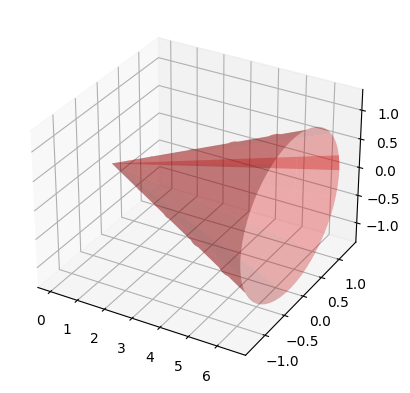

In [86]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

RR = 2.0 
hh = 10.0 
u = np.linspace(0, 6.5, 60)
v = np.linspace(0, 6.5, 60)
U, V = np.meshgrid(u, v)

X = U
Y1 = RR/hh*U*np.cos(V)
Z1 = RR/hh*U*np.sin(V)

ax.plot_surface(X, Y1, Z1, alpha=0.3, color='red', rstride=6, cstride=12)
plt.show()

1. Prepara un código que, utilizando la función `sp.integrate`, calcule el volumen de un cono de altura $h$ y radio de la base $R$.
2. Para el cono del dibujo anterior ($h=10$, $R=2$), aproxima este volumen utilizando una punto medio, trapecio y Simpson compuestas con $n=1000$.

In [87]:
# Tu código aquí